# Random Forest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing data From excel
gls=pd.read_excel('glass.xlsx',sheet_name='glass')
gls.info()
gls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
gls.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
# Inspecting data 
gls.isnull().sum()
gls[gls.duplicated()]
gls.drop_duplicates(inplace=True)
gls.shape

(213, 10)

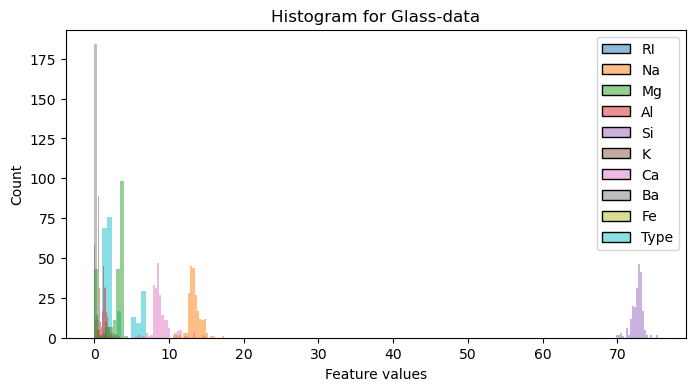

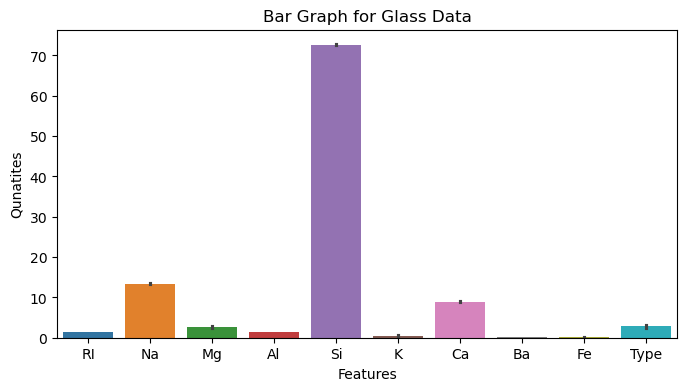

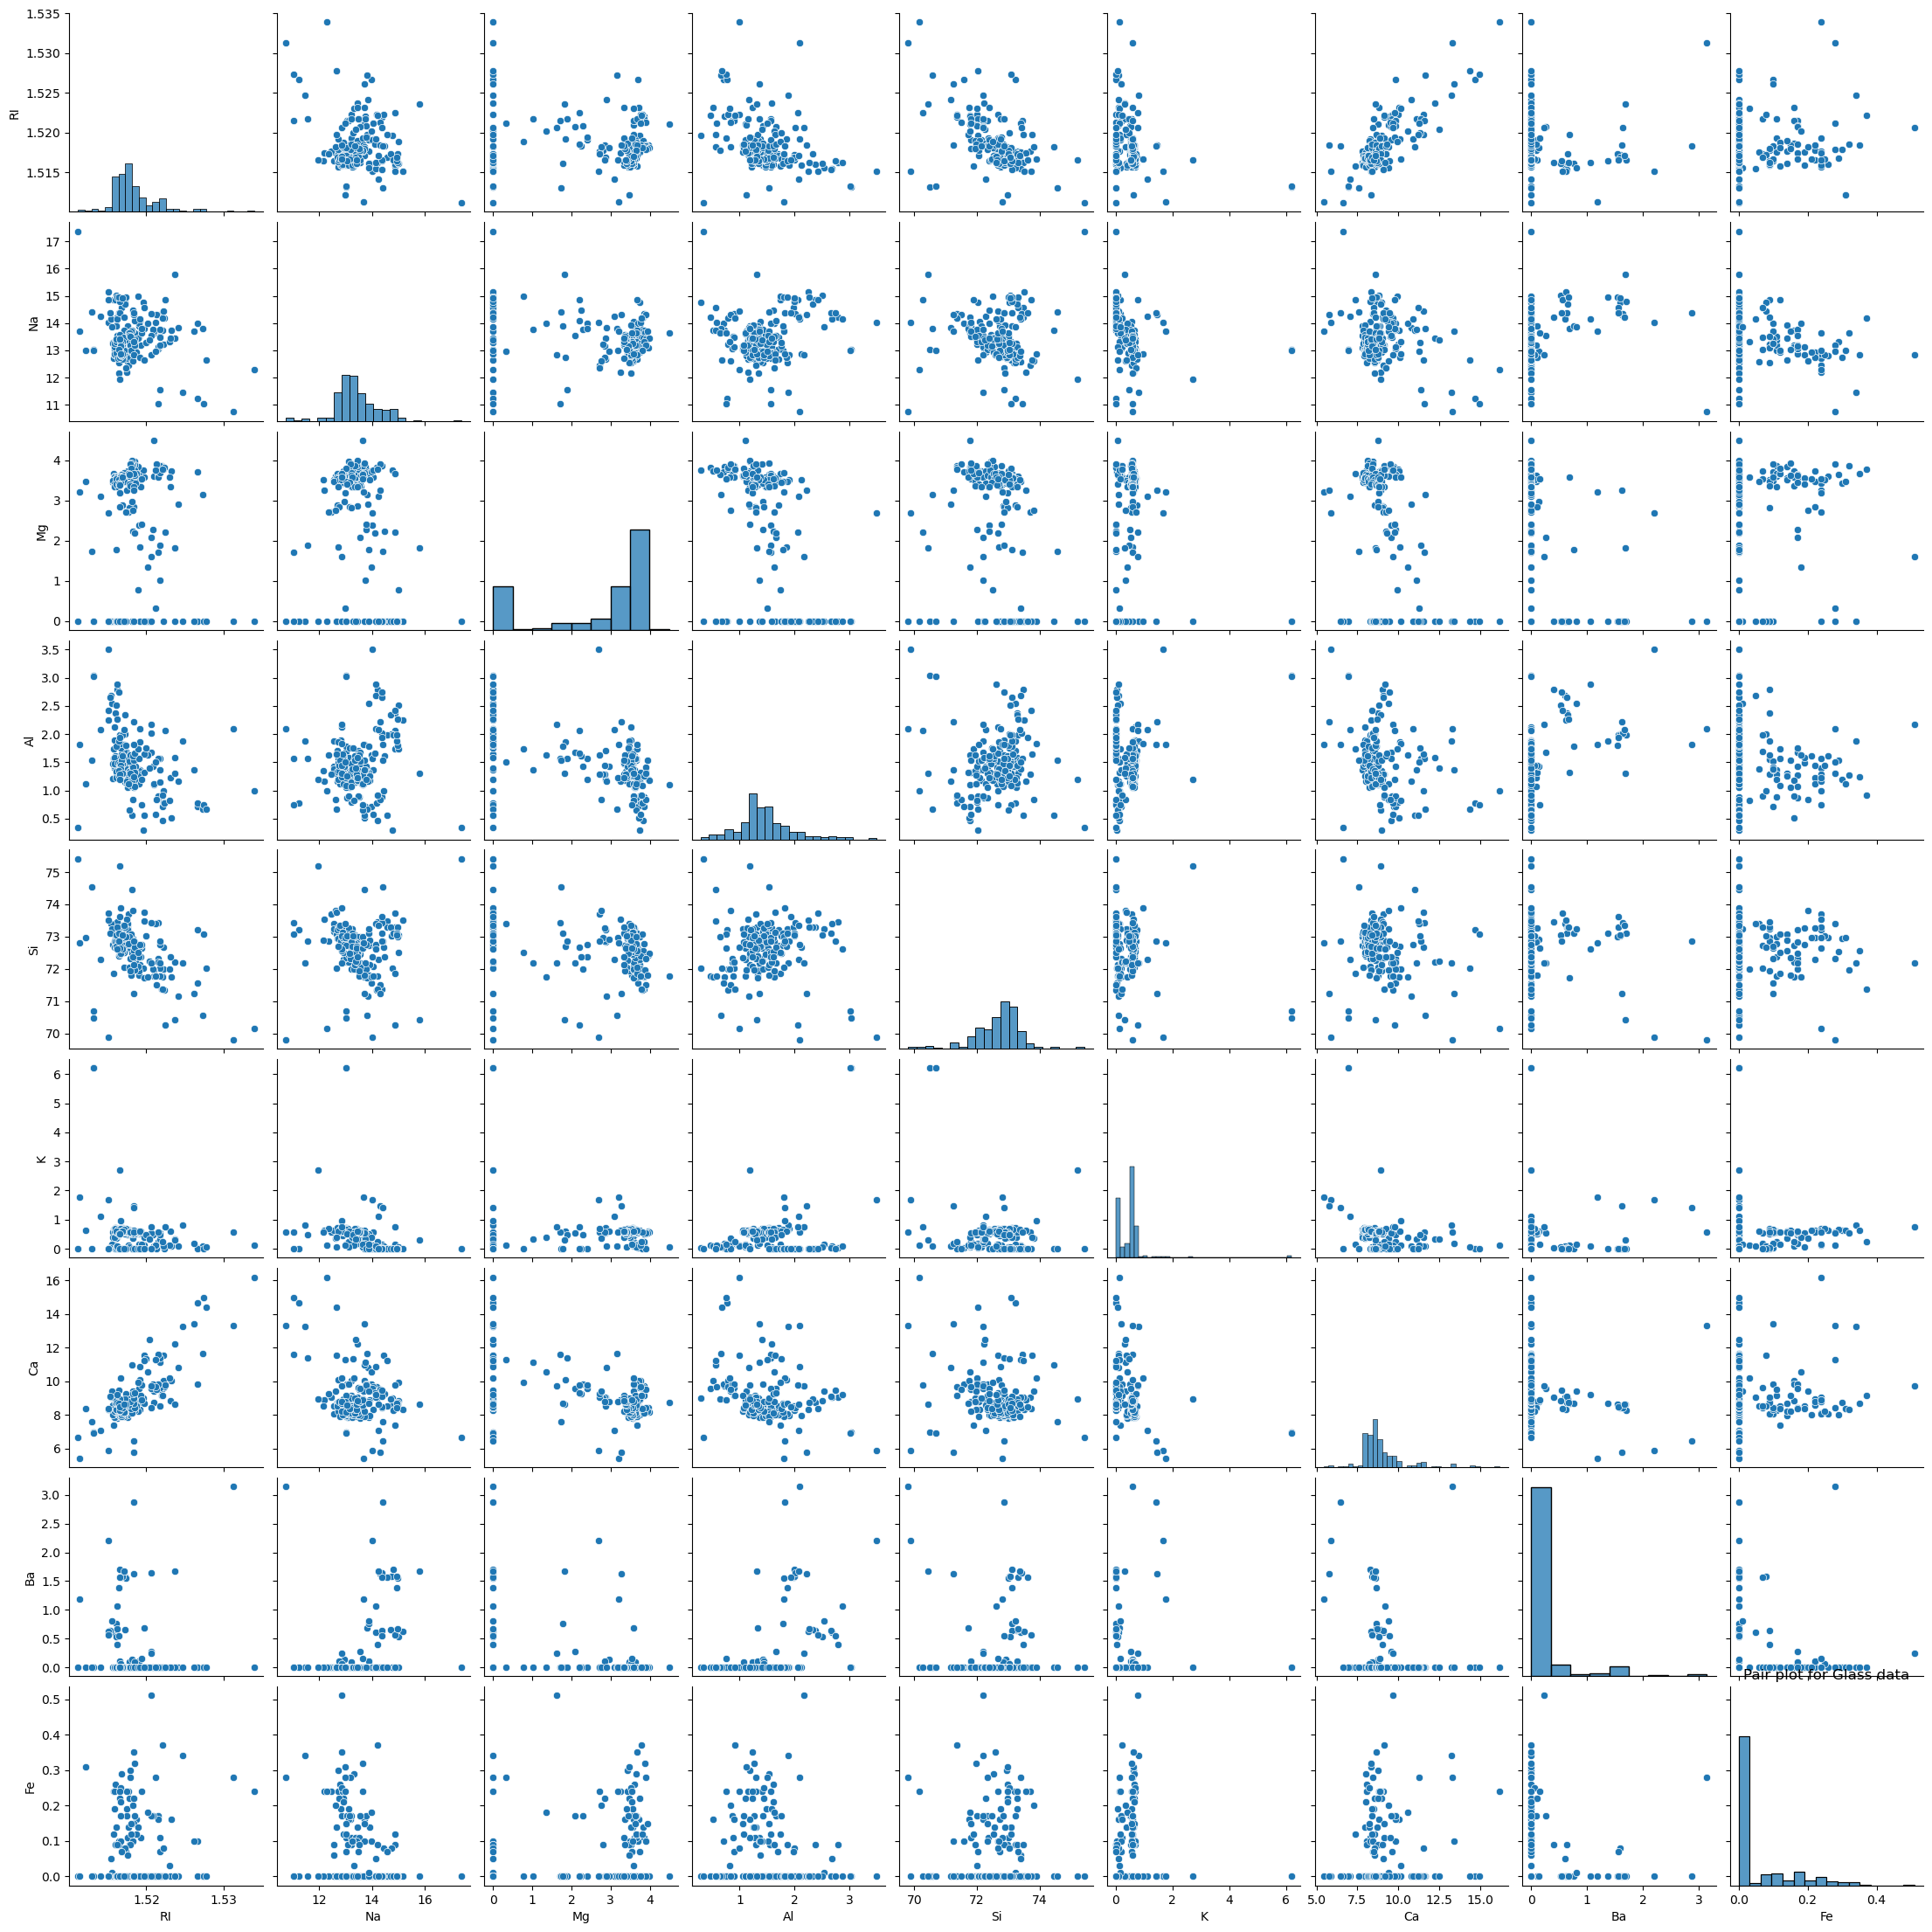

<Figure size 800x400 with 0 Axes>

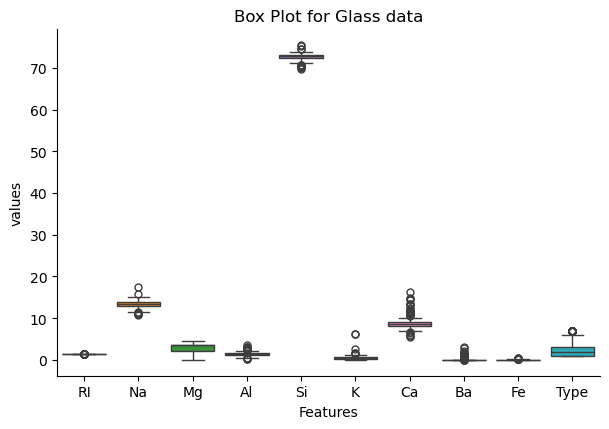

In [9]:
# Visualization of glass data for insight
# Histogram for checking summary
plt.figure(figsize=(8,4))
sns.histplot(gls,common_bins=False)
plt.title('Histogram for Glass-data')
plt.xlabel('Feature values')
plt.show()
# BarPlot to compare features and its values
plt.figure(figsize=(8,4))
sns.barplot(gls)
plt.title('Bar Graph for Glass Data')
plt.xlabel('Features')
plt.ylabel('Qunatites')
plt.show()
# pair plot to check for relation in between features
sns.pairplot(gls.iloc[:,:-1])
plt.show()
# Box plot in order to checkk outliers
sns.catplot(gls,kind='box',height=4,aspect=1.5)
plt.title('Box Plot for Glass data')
plt.xlabel('Features')
plt.ylabel('values')
plt.show()

In [10]:
# Removing Outliers by isolation forest technique
from sklearn.ensemble import IsolationForest
isoforest=IsolationForest(n_estimators=100,contamination=0.1,random_state=42)
gls['anomaly']=isoforest.fit_predict(gls)
gls['anomaly'].value_counts()
# Removing Anomalys from data
gls_cleaned=gls[gls['anomaly']==1].drop(columns=['anomaly'])
gls_cleaned

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


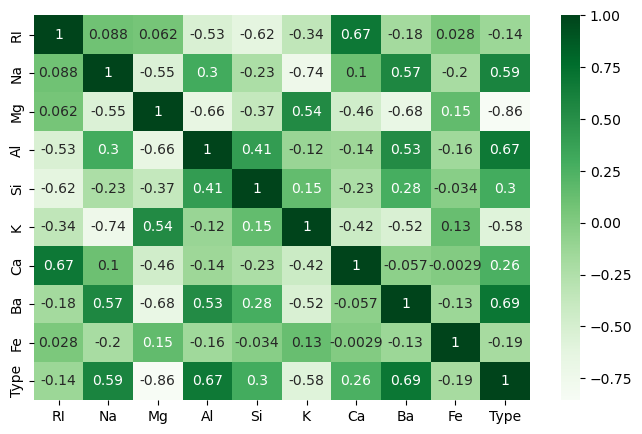

In [12]:
# Evaluating corelation between features
cor=gls_cleaned.corr()
# building Heat Map for corelation data
plt.figure(figsize=(8,5))
sns.heatmap(cor,cmap='Greens',annot=True)
plt.show()

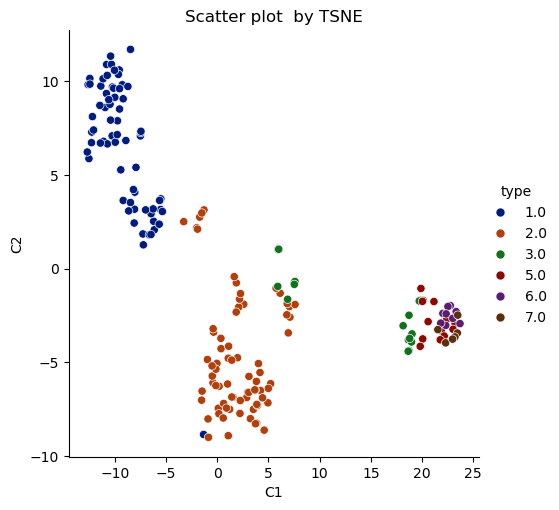

In [80]:
# Using TSNE to visuvalize data for good insigh
from sklearn.manifold import TSNE
gf=gls_cleaned.iloc[:,:-1]
tsne=TSNE(random_state=2,n_components=2)
arr=tsne.fit_transform(gls_cleaned)
gls_df=pd.DataFrame(arr,columns=['c1','c2'])
gls_df['type']=gls['Type']
# Ploting scatter plot from TSNE values
sns.relplot(gls_df,x='c1',y='c2',hue='type',kind='scatter',palette='dark')
plt.title('Scatter plot  by TSNE')
plt.xlabel('C1')
plt.ylabel('C2')
plt.show()

In [54]:
# Segregating into X and y
X=gls_cleaned.iloc[:,:-1]
y=gls_cleaned.iloc[:,-1]
# Scaling Values to take all features in range without major differences among them
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X_scaled=scale.fit_transform(X)
X_scaled

array([[0.61019284, 0.57938719, 1.        , ..., 0.30811808, 0.        ,
        0.        ],
       [0.37603306, 0.64902507, 0.80178174, ..., 0.13837638, 0.        ,
        0.        ],
       [0.27754821, 0.54874652, 0.79064588, ..., 0.12915129, 0.        ,
        0.        ],
       ...,
       [0.58539945, 0.77994429, 0.        , ..., 0.25092251, 0.95906433,
        0.        ],
       [0.30027548, 0.78551532, 0.        , ..., 0.25830258, 0.91812865,
        0.        ],
       [0.3415978 , 0.74373259, 0.        , ..., 0.28413284, 0.97660819,
        0.        ]])

In [71]:
# Training Testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,stratify=y,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((152, 9), (39, 9), (152,), (39,))

In [72]:
# Building model by RandomForest ML Algorithm
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=100,criterion='gini',n_jobs=-1)
# Training train data
rf_model.fit(X_train,y_train)
yhat_train=rf_model.predict(X_train)

In [73]:
# Evaluating output with metrics
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_train,yhat_train)
cr=classification_report(y_train,yhat_train)

In [85]:
# Predecting Y test  from X test data and Evaluating its performance
yhat_test=rf_model.predict(X_test)
cm=confusion_matrix(y_test,yhat_test)
print(classification_report(y_test,yhat_test,zero_division=1))
cm

              precision    recall  f1-score   support

           1       0.72      0.93      0.81        14
           2       0.85      0.79      0.81        14
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      0.80      0.89         5

    accuracy                           0.82        39
   macro avg       0.93      0.81      0.84        39
weighted avg       0.85      0.82      0.81        39



array([[13,  1,  0,  0,  0,  0],
       [ 3, 11,  0,  0,  0,  0],
       [ 1,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  4]], dtype=int64)

In [75]:
# Using Ensemble model 
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier
# using Bagging technique for training and predicting model
bagging_clf=BaggingClassifier(estimator=RandomForestClassifier(),n_estimators=50,random_state=42)
bagging_clf.fit(X_train,y_train)
ypred_bag=bagging_clf.predict(X_test)
# Evaluating model by Metrics 
cm=confusion_matrix(y_test,ypred_bag)
print(classification_report(y_test,ypred_bag))
cm
from sklearn.metrics import accuracy_score
print(f'Accuracy score by Bagging = {accuracy_score(y_test,ypred_bag):.2g}')

              precision    recall  f1-score   support

           1       0.72      0.93      0.81        14
           2       0.92      0.86      0.89        14
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      0.80      0.89         5

    accuracy                           0.85        39
   macro avg       0.94      0.82      0.85        39
weighted avg       0.87      0.85      0.84        39

Accuracy score by Bagging = 0.85


In [86]:
#Using boosting technique to training and predecting model
boost=AdaBoostClassifier(estimator=RandomForestClassifier(),algorithm='SAMME')
boost.fit(X_train,y_train)
ypred_boost=boost.predict(X_test)
# Evaluating model by its Metrics
cm=confusion_matrix(y_test,ypred_boost)
print(classification_report(y_test,ypred_boost))
cm
print(f'Accuracy Score of Boosting classifier = {accuracy_score(y_test,ypred_boost):.2g} ')

              precision    recall  f1-score   support

           1       0.72      0.93      0.81        14
           2       0.92      0.86      0.89        14
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      0.80      0.89         5

    accuracy                           0.85        39
   macro avg       0.94      0.82      0.85        39
weighted avg       0.87      0.85      0.84        39

Accuracy Score of Boosting classifier = 0.85 


In [87]:
# Using Gradient boosting technique for traing and testing model
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(classification_report(y_test, y_pred_gb))
print(f'Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb):.2g}')

              precision    recall  f1-score   support

           1       0.62      0.71      0.67        14
           2       0.79      0.79      0.79        14
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       0.80      0.80      0.80         5

    accuracy                           0.74        39
   macro avg       0.87      0.77      0.79        39
weighted avg       0.76      0.74      0.74        39

Gradient Boosting Accuracy: 0.74


####   
    1.
        Bagging (Bootstrap Aggregating) is an ensemble method that trains multiple models independently on different bootstrapped subsets of data and averages their predictions to reduce variance and overfitting. Random Forest is a common example.
        Boosting is an iterative method where models are trained sequentially, with each new model focusing on correcting errors of the previous ones, thereby reducing bias. Examples include AdaBoost and Gradient Boosting.
        The key difference is that Bagging reduces variance by averaging independent models, while Boosting reduces bias by improving weak models in sequence.

    2.
        i.Handling imbalanced data involves resampling techniques such as oversampling (e.g., SMOTE) to increase minority class instances or undersampling to reduce majority class dominance. These methods help balance the dataset but may risk overfitting or loss of information.
        
        ii.Using ensemble methods like Balanced Random Forest or Boosting with cost-sensitive learning can enhance model performance by focusing on minority class predictions. Lastly, relying on better evaluation metrics such as Precision-Recall, F1 Score, or Balanced Accuracy instead of simple accuracy ensures proper assessment of model performance on imbalanced datasets.
        
        iii.Another approach is adjusting class weights in models, assigning higher penalties to minority class misclassification, which helps models learn from imbalanced data without altering distribution. Synthetic data generation using techniques like GANs or ADASYN can create diverse minority samples, improving model generalization.

